# Library, Path, Data

In [2]:
import pandas as pd
import os, sys, shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ROOT_DIR = './'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'Data')

In [4]:
train = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'movies_train.csv'))
test = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'movies_test.csv'))
submission = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'submission.csv'))

# EDA

In [5]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

dir_prev_bfnum has Nan

In [6]:
numeric_col = [col for col in train.columns if train[col].dtype != object]
categori_col = ['distributor', 'genre', 'screening_rat']

In [7]:
train[numeric_col].describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
train[categori_col].describe()

,distributor,genre,screening_rat
count,600,600,600
unique,169,12,4
top,CJ 엔터테인먼트,드라마,청소년 관람불가
freq,54,221,204


In [10]:
train['distributor'] = train['distributor'].apply(lambda x: x.replace('(주)','').replace(' ',''))
train['distributor'] = train['distributor'].replace('리틀빅픽처스','리틀빅픽쳐스')
train['distributor'] = train['distributor'].replace('마운틴픽처스','마운틴픽쳐스')
train['distributor'] = train['distributor'].replace('스폰지','스폰지이엔티')
train['distributor'] = train['distributor'].replace('KT','싸이더스')
train['distributor'] = train['distributor'].replace('싸이더스FNH','싸이더스')
train['distributor'] = train['distributor'].replace('조이앤시네마','조이앤컨텐츠그룹')
train['distributor'] = train['distributor'].replace('케이알씨지','조이앤컨텐츠그룹')
train['distributor'] = train['distributor'].replace('스크린조이','조이앤컨텐츠그룹')
train['distributor'] = train['distributor'].replace('드림팩트엔터테인먼트','조이앤컨텐츠그룹')
train['distributor'] = train['distributor'].replace('CJE&MPictures','CJ엔터테인먼트')
train['distributor'] = train['distributor'].replace('CJE&M영화부문','CJ엔터테인먼트')
train['distributor'] = train['distributor'].replace('CGV무비꼴라쥬','CGV아트하우스')

In [12]:
test['distributor'] = test['distributor'].apply(lambda x: x.replace('(주)','').replace(' ',''))
test['distributor'] = test['distributor'].replace('리틀빅픽처스','리틀빅픽쳐스')
test['distributor'] = test['distributor'].replace('마운틴픽처스','마운틴픽쳐스')
test['distributor'] = test['distributor'].replace('스폰지','스폰지이엔티')
test['distributor'] = test['distributor'].replace('KT','싸이더스')
test['distributor'] = test['distributor'].replace('싸이더스FNH','싸이더스')
test['distributor'] = test['distributor'].replace('조이앤시네마','조이앤컨텐츠그룹')
test['distributor'] = test['distributor'].replace('케이알씨지','조이앤컨텐츠그룹')
test['distributor'] = test['distributor'].replace('스크린조이','조이앤컨텐츠그룹')
test['distributor'] = test['distributor'].replace('드림팩트엔터테인먼트','조이앤컨텐츠그룹')
test['distributor'] = test['distributor'].replace('CJE&MPictures','CJ엔터테인먼트')
test['distributor'] = test['distributor'].replace('CJE&M영화부문','CJ엔터테인먼트')
test['distributor'] = test['distributor'].replace('CGV무비꼴라쥬','CGV아트하우스')

### Correlation

<AxesSubplot:>

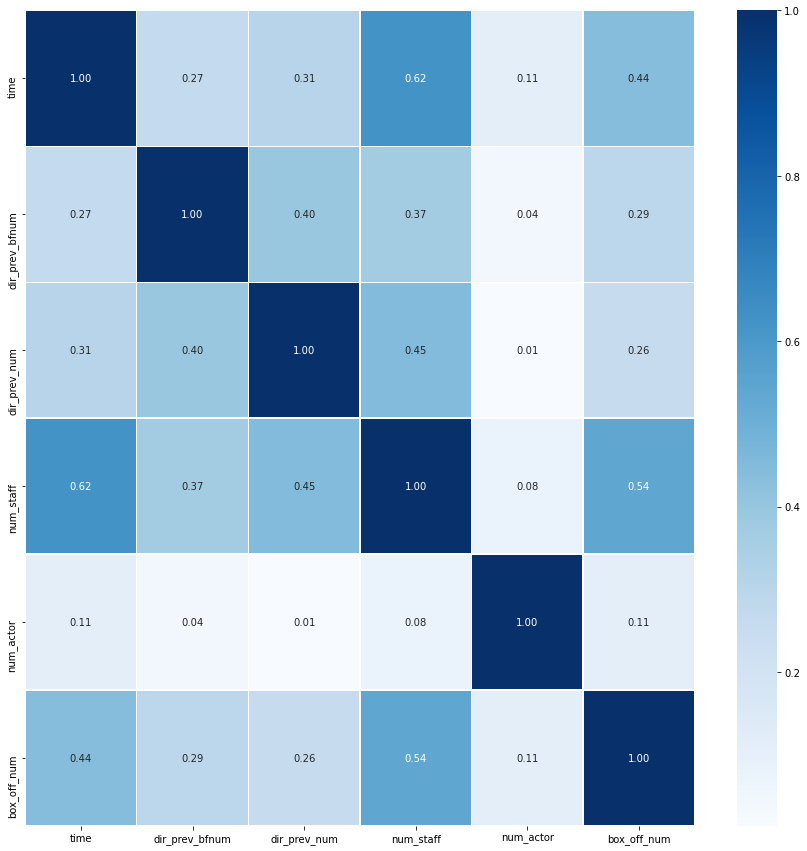

In [130]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train[numeric_col].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

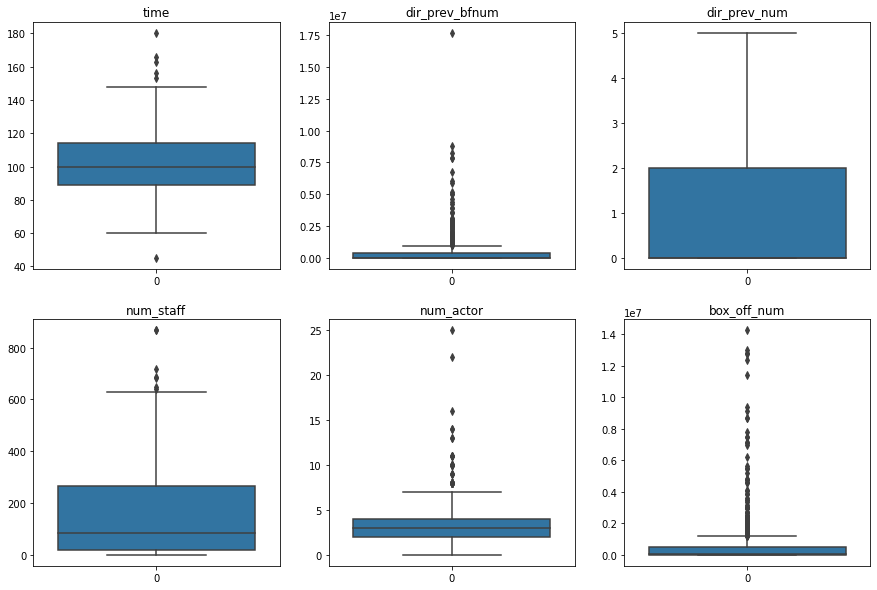

In [131]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, col in enumerate(numeric_col):
    axes[i//3, i%3].set_title(col)
    sns.boxplot(data=train[col], ax=axes[i//3, i%3])


In [132]:
train[train['dir_prev_bfnum'].sort_values(ascending=False) > 1.e7]

C:\Users\kimsoohyun\AppData\Local\Temp\ipykernel_15276\3475349099.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['dir_prev_bfnum'].sort_values(ascending=False) > 1.e7]


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.0,1,27,3,8


In [133]:
train[train['num_actor'].sort_values(ascending=False) > 20]

C:\Users\kimsoohyun\AppData\Local\Temp\ipykernel_15276\3114437394.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['num_actor'].sort_values(ascending=False) > 20]


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
80,바비,(주) 케이알씨지,드라마,2010-02-04,116,15세 관람가,에밀리오 에스테베즈,0.000000e+00,0,19,25,2821
486,뷰티 인사이드,(주)NEW,멜로/로맨스,2015-08-20,127,12세 관람가,백종열,4.210890e+06,3,572,22,2057896


In [134]:
train[train['box_off_num'].sort_values(ascending=False) > 1.e7]

C:\Users\kimsoohyun\AppData\Local\Temp\ipykernel_15276\2106507219.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['box_off_num'].sort_values(ascending=False) > 1.e7]


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,0.000000e+00,0,311,5,11374879
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.000000e+00,0,869,4,14262766
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
